
Demoing `annotated_plt()` and `start_frame`+`max_frame`. But found issue with timing files and video tracking.


In [1]:
import os
import sys
import cv2
from matplotlib import pyplot as plt


# load our code
sys.path.insert(0, os.path.abspath('../'))
from tracker import auto_tracker, set_tracker, TrackedFrame, Box
# specific to jupyter notebook
from jupyter_help import cvplt, cvplt_sub

# load any changes as we make them
%load_ext autoreload
%autoreload 2

vid_fname = "../input/run1.mov"
csv_fname = "../input/10997_20180818_mri_1_view.csv"
init_box = (64,46,70,79)

start_frame = 6*60 # 6 seconds is start of first trial
end_frame = start_frame + 12*60 # 10 seconds after start should get all of trail

Run eye tracking for 6 to 12 seconds

In [2]:

track = auto_tracker(vid_fname, init_box, write_img=False, start_frame=start_frame, max_frames=end_frame)
track.set_events(csv_fname)
track.run_tracker()

initializign tracking @ 360 frame
@ step 500, center = (105.00, 84.50); 78.16 fps
@ step 750, center = (99.00, 84.50); 78.64 fps
@ step 1000, center = (105.00, 85.50); 78.54 fps
Ending of the analysis


## task
Here is an attempt to match task onsets to eye tracking w/ colored vertical lines for each type. 

But they do not overlap! Wrong file?! ~Wrong FPS?~ Saccades appear to happen before the event onset. The participant is not prescient. 

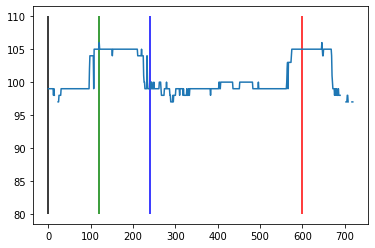

In [3]:

plt.plot([float('nan') if x==0 else x for x in track.pupil_x])
d = track.onset_labels
in_range = (d.onset_frame >= start_frame) & (d.onset_frame <= end_frame)
d = d[in_range]
event_colors = {'cue': 'k', 'vgs': 'g', 'dly': 'b', 'mgs': 'r'}
plt.vlines(d.onset_frame - start_frame,80,110, color=[event_colors[x] for x in d.event])


### into function
Pulled this code into the class as function `annotated_plt`.

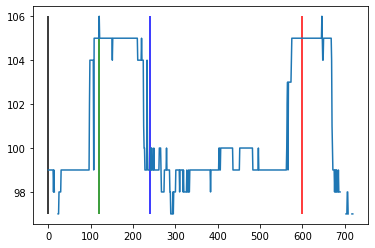

In [4]:
track.annotated_plt()

## image
Also added a new frame overlay drawer to add event to frames. But is also likely misaligned.

Note the colored symbol on the top left and right

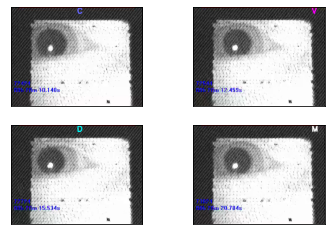

,index,side,event,onset,onset_frame
0,0,Right,cue,6.0,360
1,24,Right,vgs,8.0,480
2,48,Right,dly,10.0,600
3,72,Right,mgs,16.0,960
4,1,Left,cue,20.0,1200
...,...,...,...,...,...
91,94,NearLeft,mgs,388.0,23280
92,23,Right,cue,392.0,23520
93,47,Right,vgs,394.0,23640
94,71,Right,dly,396.0,23760


In [5]:
vs = cv2.VideoCapture(vid_fname)

count = 6*60
vs.set(1, count)
tframe = TrackedFrame(vs.read()[1], count)
track.draw_event(tframe.frame, count)
cue = tframe.frame.copy()

count = (6+2)*60
vs.set(1, count)
tframe = TrackedFrame(vs.read()[1], count)
box = track.find_box(tframe.frame)
tframe.set_box(box)
track.draw_event(tframe.frame, count)
vgs = tframe.frame.copy()

count = (6+5)*60
vs.set(1, count)
tframe = TrackedFrame(vs.read()[1], count)
track.draw_event(tframe.frame, count)
dly = tframe.frame.copy()

count = (6+10)*60
vs.set(1, count)
tframe = TrackedFrame(vs.read()[1], count)
track.draw_event(tframe.frame, count)
mgs = tframe.frame.copy()

cvplt_sub([cue, vgs, dly, mgs],2,2)
track.onset_labels